The actual EP production 

In [140]:
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import itertools
import scipy


## Define global params
J = 1.
M = 1.
beta = 0.7
n = 4


## Define a function to calculate the hamiltonian for a given spin config
def get_H(spin_config):
    length = len(spin_config)
    
    H_tot = 0.
    for i in range(length-1):
        H_i = 0.
        if i%2 == 0:
            H_i = -M*spin_config[i]
        else:
            H_i = -J*(spin_config[i]*spin_config[i-1]+spin_config[i]*spin_config[i+1])-M*spin_config[i]
        H_tot = H_tot + H_i    
        
    ### Calculate contribution from PBC
    H_i = 0
    if length%2 == 0:
        H_i = -J*(spin_config[-1]*spin_config[-2]+spin_config[-1]*spin_config[0])-M*spin_config[-1]
    else:
        H_i = -M*spin_config[-1]
    H_tot = H_tot + H_i

    return(H_tot)


## Define a function to return all spin configs of size n
def all_configs(n):
    final_array = []
    for i in itertools.product('01', repeat=n):
        empty_list = []
        for each in i:
            if each == '0':
                empty_list.append(-1)
            else:
                empty_list.append(1)
        final_array.append(empty_list)
    return(final_array)
    
    for i in range(np.power(2,n)):
        print(i)


## Calculate Rate Matrix W
spin_configs = all_configs(n)
spin_df = pd.DataFrame(spin_configs)
pi_vector = []
for config in spin_configs:
    H = get_H(config)
    pi_vector.append(np.exp(-beta*H))
pi_vector = pi_vector/np.sum(pi_vector) ## normalize
    
PI = np.diag(pi_vector)
R = np.ones((np.power(2,n),np.power(2,n)))  # assume R is a matrix of all ones
# R = np.diag(np.ones(np.power(2,n)))  # if R is a diagonal matrix then W = 0 (not interesting)

W = np.matmul(R,PI)-np.diag(np.matmul(R,pi_vector))

W = np.transpose(W)
# Make sure columns sum to zero
for col in range(np.power(2,n)):
    if np.abs(np.sum(W[:,col])) > 1e-14:
        print("ERROR - cols should sum to one",np.sum(W[col,:]))
        
# Make sure local detailed balance is satisfied
for i in range(n):
    for j in range(m):
        W_ij = W[i,j]
        P_j = pi_vector[j]
        W_ji = W[j,i]
        P_i = pi_vector[i]
        if W_ij*P_j != W_ji*P_i:
            print("ERROR - Local Detailed Balance Violated!")
        
## Initialize distribution and evolve
t_array = np.linspace(0,10,100)
# p_0 = np.zeros(np.power(2,n))
# p_0[0] = 1.0
p_0 = np.random.rand(np.power(2,n))
p_0 = p_0/np.sum(p_0)
# p_0 = np.ones(np.power(2,n))
# p_0 = p_0/np.sum(p_0)
# print(p_0)


def dp_dt(p_array,t):
    return np.matmul(W,p_array)

print("Starting Integration...")
p_array = scipy.integrate.odeint(dp_dt,p_0,t_array)
df = pd.DataFrame(p_array)
print("Done")

Starting Integration...
Done


In [141]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.024365,0.056581,0.017468,0.010270,0.018972,0.101418,0.011502,0.078914,0.131427,0.129136,0.032385,0.050231,0.111836,0.119990,0.056424,0.049082
1,0.022353,0.051226,0.015871,0.009611,0.017231,0.091694,0.010725,0.072663,0.118881,0.117057,0.029293,0.046736,0.101420,0.109792,0.052334,0.133114
2,0.020533,0.046386,0.014427,0.009016,0.015656,0.082904,0.010023,0.067013,0.107540,0.106139,0.026499,0.043577,0.092004,0.100575,0.048637,0.209073
3,0.018889,0.042010,0.013122,0.008478,0.014233,0.074959,0.009388,0.061905,0.097289,0.096270,0.023973,0.040721,0.083493,0.092243,0.045295,0.277735
4,0.017402,0.038055,0.011942,0.007991,0.012946,0.067777,0.008814,0.057288,0.088023,0.087349,0.021689,0.038139,0.075799,0.084711,0.042274,0.339799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003417,0.000846,0.000843,0.003416,0.000844,0.000215,0.003416,0.013856,0.000851,0.003424,0.000210,0.013854,0.003423,0.013859,0.013855,0.923669
96,0.003417,0.000846,0.000843,0.003416,0.000843,0.000214,0.003416,0.013856,0.000850,0.003424,0.000210,0.013854,0.003422,0.013858,0.013854,0.923675
97,0.003417,0.000845,0.000843,0.003416,0.000843,0.000213,0.003416,0.013855,0.000850,0.003423,0.000210,0.013854,0.003422,0.013858,0.013854,0.923680
98,0.003417,0.000845,0.000843,0.003416,0.000843,0.000213,0.003416,0.013855,0.000849,0.003422,0.000209,0.013854,0.003421,0.013857,0.013854,0.923685


#### Calculate the entropy production at each timestep

In [142]:
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import scipy


## Define function to calculate the actual EP
def get_EP(W,p_array):
    EP = 0
    n,m = np.shape(W)
    for i in range(n):
        for j in range(m):
            EP = EP + 1/2*(W[i,j]*p_array[j]-W[j,i]*p_array[i])*np.log(W[i,j]*p_array[j]/(W[j,i]*p_array[i]))
    return(EP)


## Define Function to calculate entropy
def get_S(dist):
    S = 0
    for p_i in dist:
        if p_i != 0.:
            S = S - p_i*np.log2(p_i)
    return(S)


## Define Function to get the units in our autonomous spin model
def get_units(n):
    if n%2 != 0:
        print("ERROR - n must be even!")
        return(-1)
    else: 
        units = []
        for i in range(n-1):
            if i%2 == 0:
                units.append([i])
            else:
                units.append([i-1,i,i+1])
        units.append([n-2,n-1,0])
        return(units)

    
## Define Function to calculate in-ex sum for a given dependency struct
def I_Nstar(p_array,units):
    prob_dist = p_array
#     print("\nPROB DIST = ",prob_dist)
    n_units = len(units)
    
    ## First get entropy of global system
    S_tot = -1*get_S(prob_dist)
#     print("Global Entropy Contribution = ",S_tot)
    
    ## Now get entropy of units
    for unit in units:
        if len(unit) == 1:
            sign = -1.
        elif len(unit) == 3:
            sign = 1.
        else:
            print("ERROR - UNIT NOT A NODE OR LEAF")
            break
            
        configurations = all_configs(len(unit))  # gets possible values for intersection
        p_dist = []   # empty list to hold the probabilities over the different configurations
                
        ## Calculate entropy of marginal distribution
        for spin_config in configurations:
            index_list = []
            
            ## get index where original array matches spin_config
            for m in range(len(unit)):
                subsystem = unit[m]  # get the index of each spin
                index_list.append(spin_df.index[spin_df[subsystem]==spin_config[m]].tolist())
            final_indices = list(set(index_list[0]).intersection(*index_list))
            p_dist.append(np.sum(np.asarray(prob_dist)[final_indices]))
        S_tot = S_tot + sign*get_S(p_dist)  # sum entropy contribution from unit
        
    return(S_tot)



EP_bounds = []
EP_actual = []
for i in range(len(df)-1):
    print("i = ",i)
    p_0 = df.loc[i,:]
    p_f = df.loc[i+1,:]
    I_t0 = I_Nstar(p_0,get_units(n))
    I_tf = I_Nstar(p_f,get_units(n))
    EP_bounds.append(-(I_tf-I_t0))
    EP_actual.append(get_EP(W,p_0))
print("DONE")

i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
i =  10
i =  11
i =  12
i =  13
i =  14
i =  15
i =  16
i =  17
i =  18
i =  19
i =  20
i =  21
i =  22
i =  23
i =  24
i =  25
i =  26
i =  27
i =  28
i =  29
i =  30
i =  31
i =  32
i =  33
i =  34
i =  35
i =  36
i =  37
i =  38
i =  39
i =  40
i =  41
i =  42
i =  43
i =  44
i =  45
i =  46
i =  47
i =  48
i =  49
i =  50
i =  51
i =  52
i =  53
i =  54
i =  55
i =  56
i =  57
i =  58
i =  59
i =  60
i =  61
i =  62
i =  63
i =  64
i =  65
i =  66
i =  67
i =  68
i =  69
i =  70
i =  71
i =  72
i =  73
i =  74
i =  75
i =  76
i =  77
i =  78
i =  79
i =  80
i =  81
i =  82
i =  83
i =  84
i =  85
i =  86
i =  87
i =  88
i =  89
i =  90
i =  91
i =  92
i =  93
i =  94
i =  95
i =  96
i =  97
i =  98
DONE


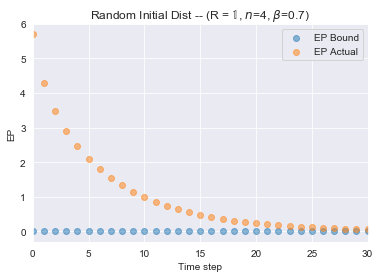

In [143]:
plt.scatter(range(len(df)-1),EP_bounds,alpha=0.5,label='EP Bound')
plt.scatter(range(len(df)-1),EP_actual,alpha=0.5,label='EP Actual')

# plt.scatter(inter_lower_uniform_dict.keys(),inter_lower_uniform_dict.values(),alpha=0.5,label='uniform initial dist')
# plt.scatter(inter_lower_delta_dict.keys(),inter_lower_delta_dict.values(),marker='x',alpha=0.5,label=r'$\delta$ initial dist')
plt.xlabel('Time step')
plt.ylabel('EP')
plt.title(r'Random Initial Dist -- (R = $\mathbb{1}$, $n$='+str(n)+r', $\beta$='+str(beta)+')')
# plt.ylim((0,0.15))
plt.xlim((0,30))
plt.legend(loc='best')
plt.savefig('bound_vs_actual_03.pdf')
plt.show()